In [1]:
import numpy as np
import glob
import wrf
from netCDF4 import Dataset, MFDataset
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.dates as mdates


In [2]:
files_pred = sorted(glob.glob('/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02_2018-05-23*'))
files_obs = sorted(glob.glob('/home/lucas/dados_vento/ecc*'))
torres = pd.read_csv('/home/lucas/dados_vento/lat_lon_towers.txt', usecols=[1,2]).values

In [ ]:
x_ =[]
y_ =[]
times=[]
wind=[]
for wrfile in files_pred:
    
    file = Dataset(wrfile)
    wspeed = wrf.getvar(file, 'wspd_wdir')[0]
    
    time_wrf = str(wrfile[73:])
    time = dt.datetime.strptime(time_wrf, '%Y-%m-%d_%H:%M:%S')
    
    ecc1 = pd.read_csv('/home/lucas/dados_vento/ecc1_.csv')
    variaveis  = ecc1[ecc1.data.values == '2018-05-23 {:02d}:{:02d}:00'.format(time.hour, time.minute)]
    
    vs_med = variaveis.vs_med
    vm_med = variaveis.vm_med
    vi_med = variaveis.vi_med
    xi = float(vs_med)
    
    n=0
    wind=[]
    
    a = wrf.interplevel(wspeed, z, [312.43304+108,336.6772+108,298.94324+108])

    abslat = np.abs(lat-torres[0,0])
    abslon = np.abs(lon-torres[0,1])
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    wind_ = a[0,x,y]
    wind.append(wind_)
    
    
    #torre_1 = wspeed[0,int(coordenadas),int(coordenadas)].values
    
    yi=float(wind)
    #yi=np.array(xi)
    
    times.append('{}:{}'.format(time.hour,time.minute))
    
    x_.append(xi)
    y_.append(yi)

In [ ]:
file = '/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02_2018-05-24_08:00:00'
wrfile = Dataset(file)
vento = wrf.getvar(wrfile, 'wspd_wdir')[0]
z = wrf.getvar(wrfile, 'z', units='m')

n=0
coordenadas=[]
wind=[]
while n<3:
    a = wrf.interplevel(vento, z, [312.43304+108,336.6772+108,298.94324+108])

    abslat = np.abs(lat-torres[n,0])
    abslon = np.abs(lon-torres[n,1])
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    wind_ = a[0,x,y]
    wind.append(wind_)
    n+=1
torre_1 = wind[0].values
torre_2 = wind[1].values
torre_3 = wind[2].values

In [7]:
wind=[]
obs=[]
lista_time=[]
for wrfile in files_pred:
    
    file = Dataset(wrfile)
    wspeed = wrf.getvar(file, 'wspd_wdir')[0]

    lon = wrf.getvar(file, 'lon')
    lat = wrf.getvar(file, 'lat')    
    z = wrf.getvar(file, 'z', units='m')

    a = wrf.interplevel(wspeed, z, [312.43304+100,336.6772+100,298.94324+100])

    abslat = np.abs(lat-torres[0,0])
    abslon = np.abs(lon-torres[0,1])
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    wind_ = a[0,x,y]
    wind.append(wind_)

    time_wrf = str(wrfile[73:])
    time = dt.datetime.strptime(time_wrf, '%Y-%m-%d_%H:%M:%S')
    
    ecc1 = pd.read_csv('/home/lucas/dados_vento/ecc1_.csv')
    variaveis  = ecc1[ecc1.data.values == '2018-05-23 {:02d}:{:02d}:00'.format(time.hour, time.minute)]
    lista_time.append('{:02d}:{:02d}'.format(time.hour,time.minute))
    
    vs_med = variaveis.vs_med
    vm_med = variaveis.vm_med
    vi_med = variaveis.vi_med
    xi = float(vs_med)
    obs.append(xi)

In [ ]:
np.array(wind).shape

In [ ]:
np.array(wind)[:,0,0]

In [ ]:
np.array(lista_time).shape

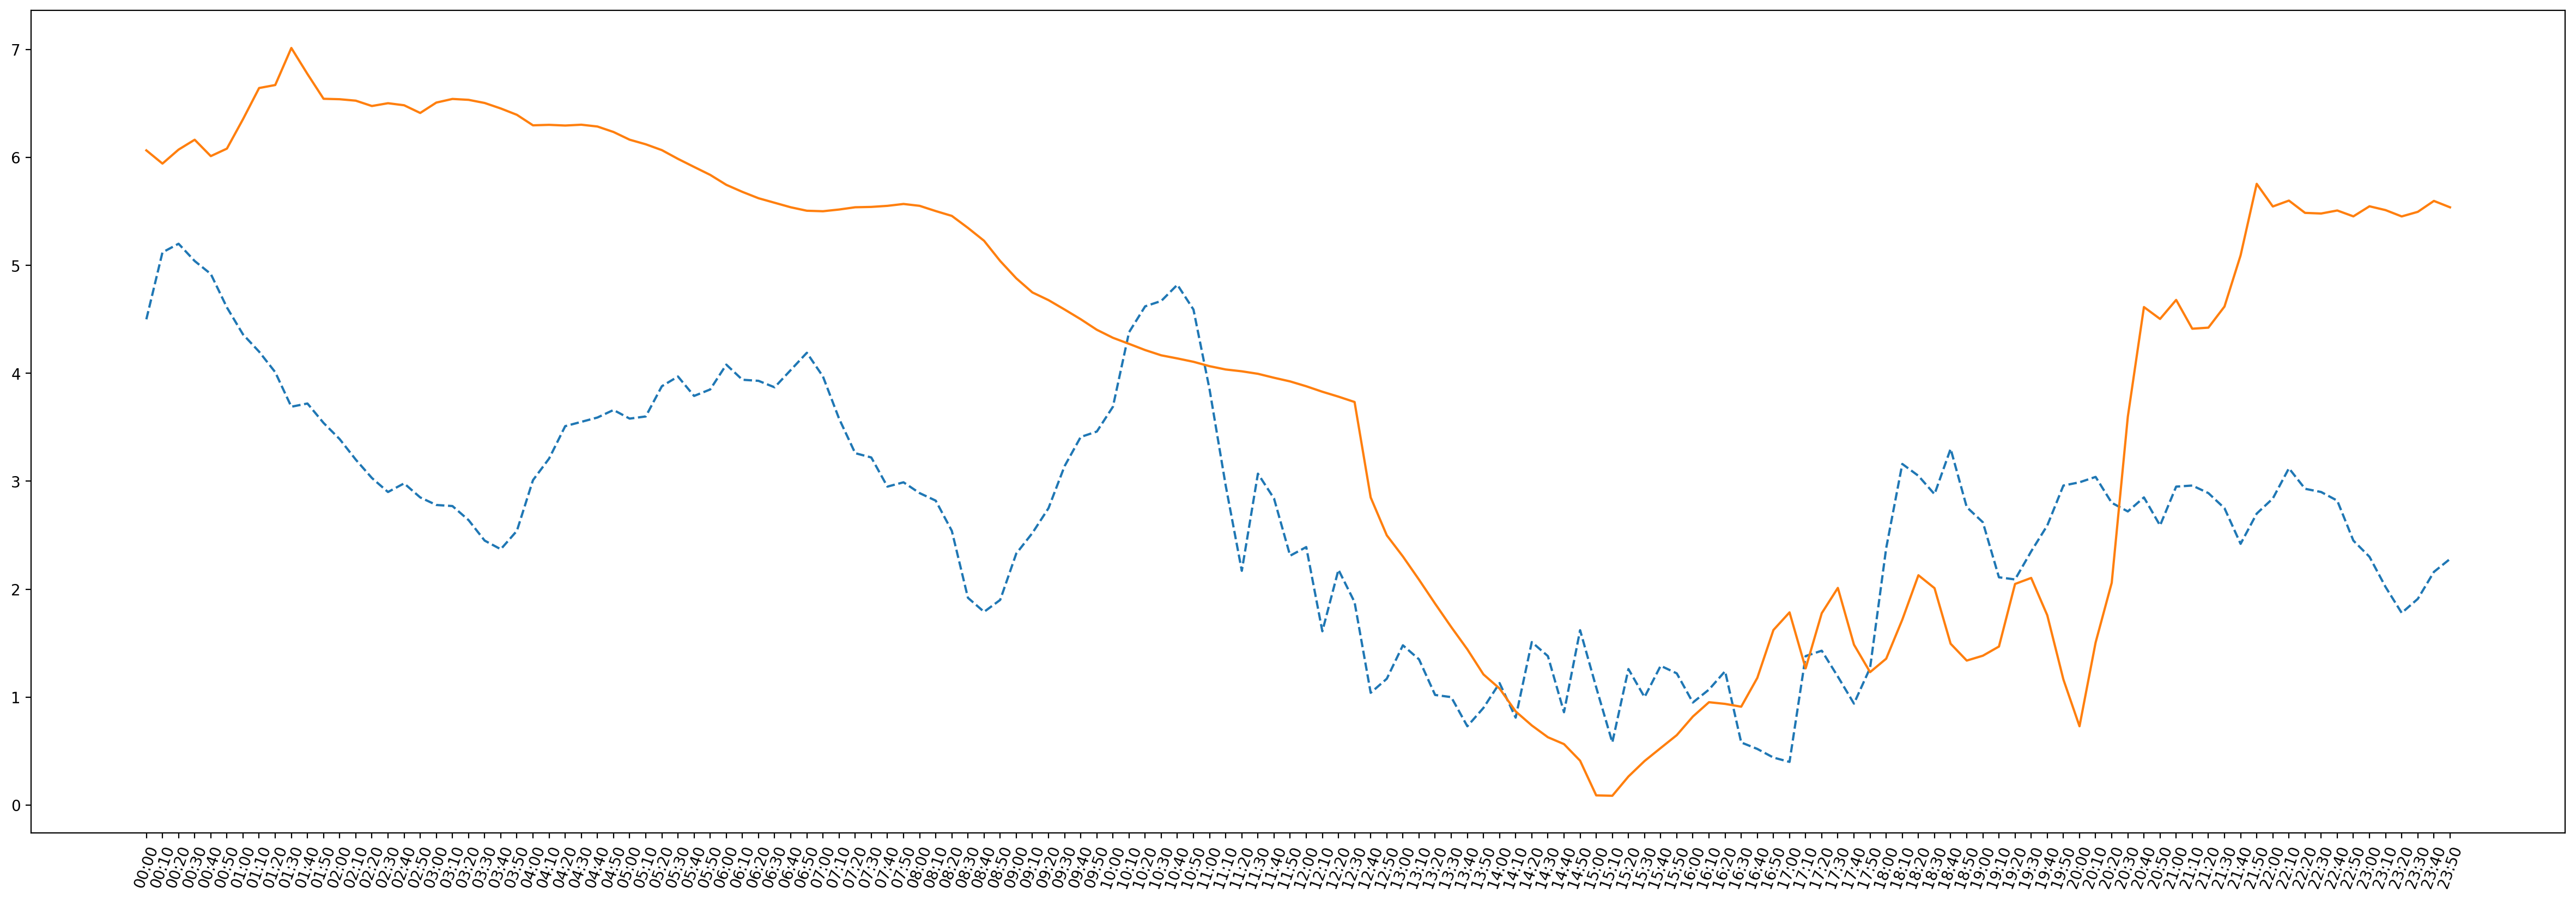

In [8]:
plt.figure(figsize=[30,10],dpi=200)
plt.plot(lista_time,obs, '--')
plt.plot(np.array(wind)[:,0,0])
degrees = 70
plt.xticks(rotation=degrees)
plt.savefig('/home/lucas/dados_vento/TESTE.png')

In [ ]:
int(coordenadas[0][0]), int(coordenadas[0][1])

In [ ]:
wspeed[0,int(coordenadas[0][0]),int(coordenadas[0][1])].values

In [ ]:
lista_vento=[]
lista_time=[]
for wrfile in files_pred:
    
    file = Dataset(wrfile)
    lon = wrf.getvar(file, 'lon')
    lat = wrf.getvar(file, 'lat')
    wspeed = wrf.getvar(file, 'wspd_wdir')[0]
    time_wrf = str(wrfile[73:])
    time = dt.datetime.strptime(time_wrf, '%Y-%m-%d_%H:%M:%S')
    lista_time.append('{:02d}:{:02d}'.format(time.hour,time.minute))
    lista_vento.append(wspeed[0,45,49])

In [ ]:
plt.figure(figsize=[35,15],dpi=500)
plt.plot(np.array(lista_time),np.array(lista_vento))
degrees = 70
plt.xticks(rotation=degrees)
plt.savefig('/home/lucas/dados_vento/TESTE.png')